In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dt_eda = pd.read_csv('output_eda_elite_2.csv', index_col=0)
dt_opt = pd.read_csv('output_optimizers2.csv', index_col=0)

In [3]:
dt_eda_gb_mean = dt_eda.groupby(['p']).mean()[['best_cost', 'time']]
dt_eda_gb_std = dt_eda.groupby(['p']).std()[['best_cost', 'time']]

dt_opt_gb_mean = dt_opt.groupby(['opt', 'p']).mean()[['best_cost', 'time']]
dt_opt_gb_std = dt_opt.groupby(['opt', 'p']).std()[['best_cost', 'time']]

ADAM no ha sido analizado porque el tiempo crece de manera abusiva

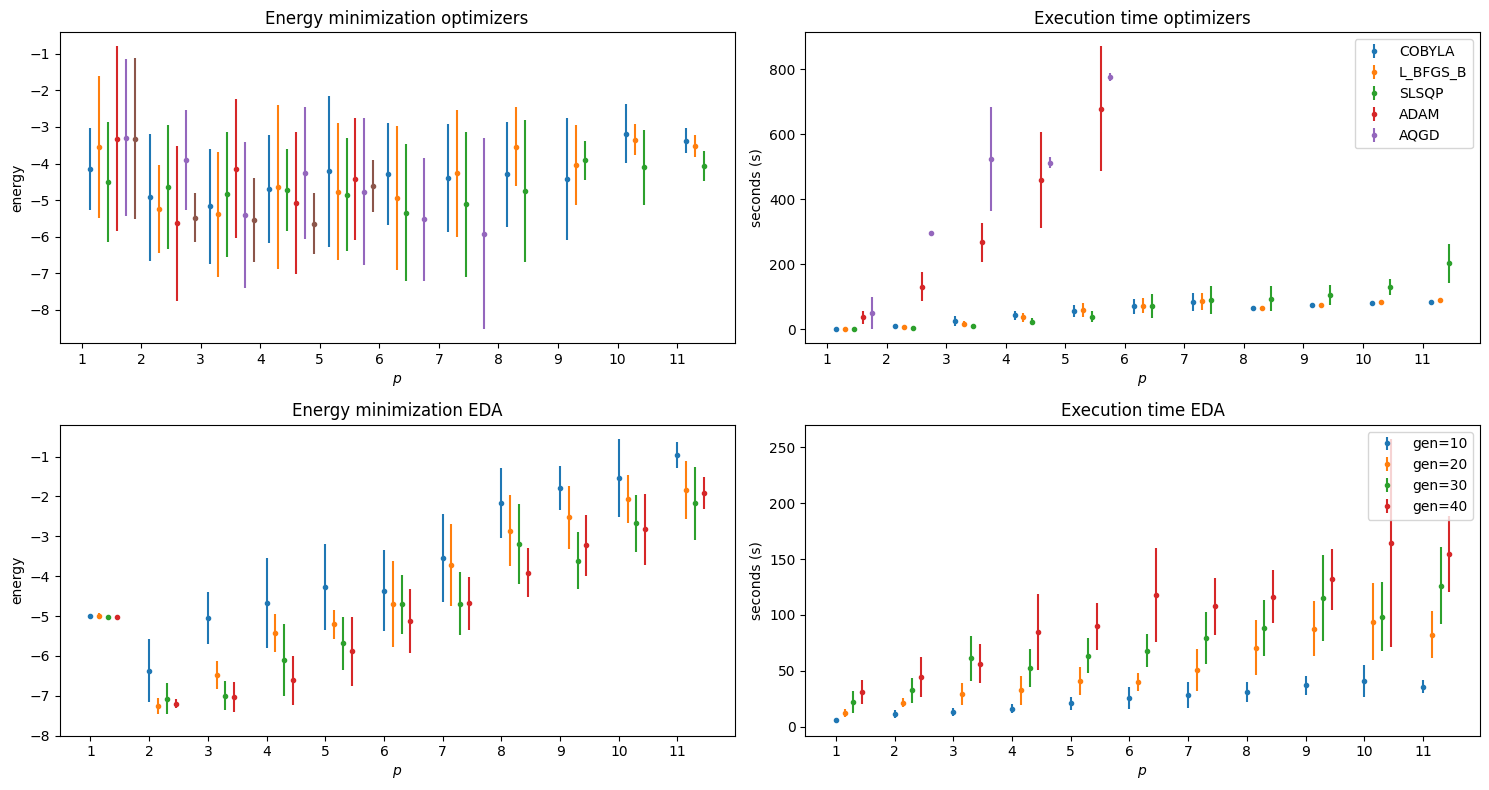

In [12]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Energy minimization optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['best_cost'].values, yerr=dt_eda_gb_std['best_cost'].values, fmt='.', label='EDA')
aux = 0.15
for opt in dt_opt['opt'].unique():
# for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
    dt_aux_mean = dt_opt_gb_mean.loc[opt]
    dt_aux_std = dt_opt_gb_std.loc[opt]
    plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.15
    
plt.xlabel('$p$')
plt.yticks(np.arange(-8, 0, 1))
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(222)
plt.title('Execution time optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['time'].values, yerr=dt_eda_gb_std['time'].values, fmt='.', label='EDA')
aux = 0.15
for opt in dt_opt['opt'].unique():
    if opt != 'CG':
# for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
        dt_aux_mean = dt_opt_gb_mean.loc[opt]
        dt_aux_std = dt_opt_gb_std.loc[opt]
        plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
        aux = aux + 0.15

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))

plt.subplot(223)
plt.title('Energy minimization EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30, 40]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['best_cost'].values, yerr=gb_std['best_cost'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.yticks(np.arange(-8, 0, 1))
plt.xlabel('$p$')
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(224)
plt.title('Execution time EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30, 40]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['time'].values, yerr=gb_std['time'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.legend()
plt.yticks(range(0, 260, 50))
plt.xlabel('$p$')
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))

plt.tight_layout()

plt.show()

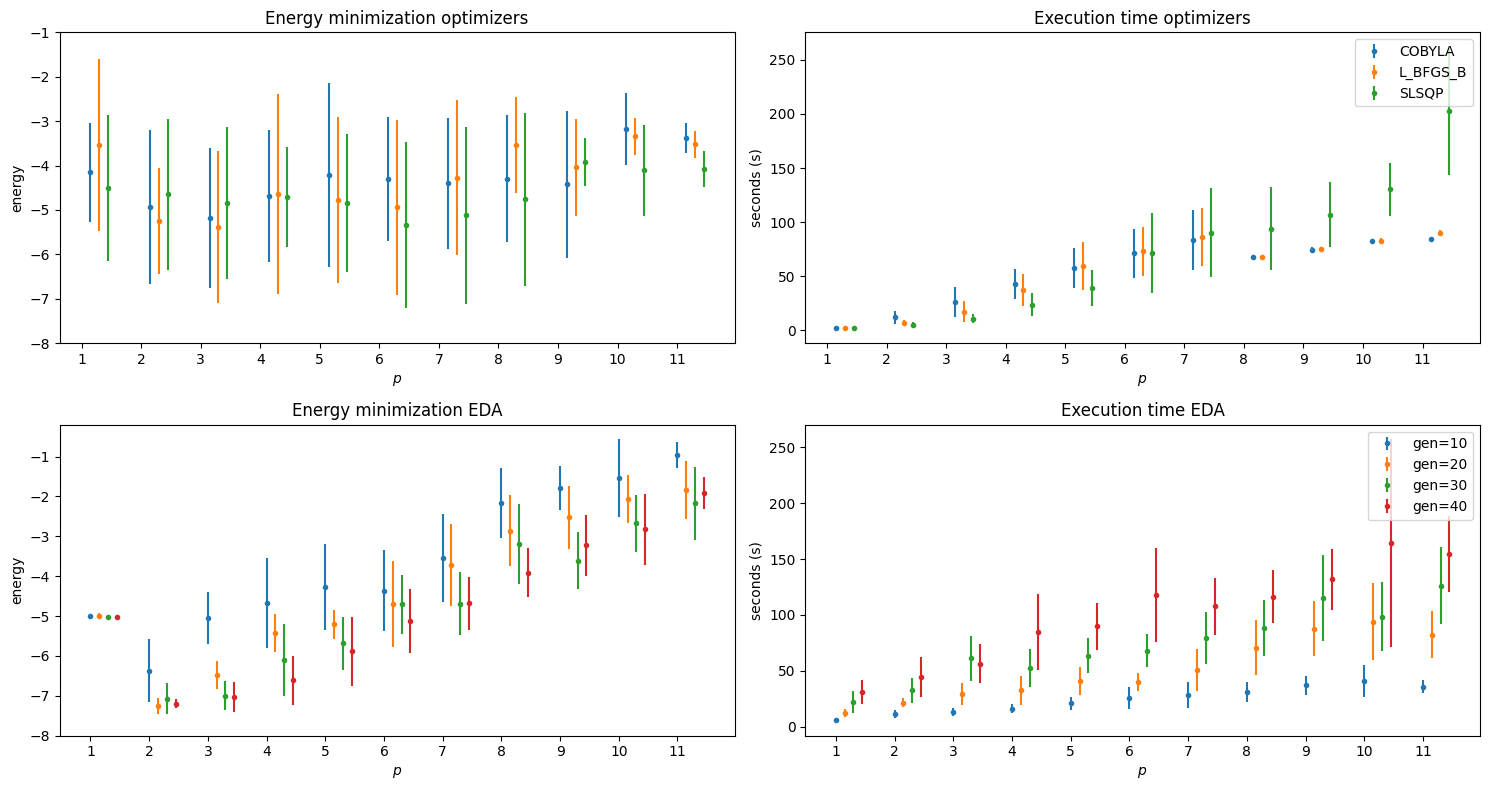

In [13]:
plt.figure(figsize=(15,8))
plt.subplot(221)
plt.title('Energy minimization optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['best_cost'].values, yerr=dt_eda_gb_std['best_cost'].values, fmt='.', label='EDA')
aux = 0.15
# for opt in dt_opt['opt'].unique():
for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
    dt_aux_mean = dt_opt_gb_mean.loc[opt]
    dt_aux_std = dt_opt_gb_std.loc[opt]
    plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['best_cost'].values, yerr=dt_aux_std['best_cost'].values, fmt='.', label=opt)
    aux = aux + 0.15
    
plt.xlabel('$p$')
plt.yticks(np.arange(-8, 0, 1))
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(222)
plt.title('Execution time optimizers')
# plt.errorbar(range(1, len(dt_eda_gb_mean) + 1), dt_eda_gb_mean['time'].values, yerr=dt_eda_gb_std['time'].values, fmt='.', label='EDA')
aux = 0.15
# for opt in dt_opt['opt'].unique():
#     if opt != 'CG':
for opt in ['COBYLA', 'L_BFGS_B', 'SLSQP']:
        dt_aux_mean = dt_opt_gb_mean.loc[opt]
        dt_aux_std = dt_opt_gb_std.loc[opt]
        plt.errorbar([i + aux for i in range(1, len(dt_aux_mean) + 1)], dt_aux_mean['time'].values, yerr=dt_aux_std['time'].values, fmt='.', label=opt)
        aux = aux + 0.15

plt.xlabel('$p$')
plt.legend()
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))

plt.subplot(223)
plt.title('Energy minimization EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30, 40]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['best_cost'].values, yerr=gb_std['best_cost'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.yticks(np.arange(-8, 0, 1))
plt.xlabel('$p$')
plt.ylabel('energy')
plt.xticks(range(1, 12))
    
plt.subplot(224)
plt.title('Execution time EDA')
aux = 0
# for size in dt_eda.size_gen.unique():
for size in [10, 20, 30, 40]:
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.errorbar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['time'].values, yerr=gb_std['time'].values, fmt='.', label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.legend()
plt.yticks(range(0, 260, 50))
plt.xlabel('$p$')
plt.ylabel('seconds (s)')
plt.xticks(range(1, 12))

plt.tight_layout()

plt.show()

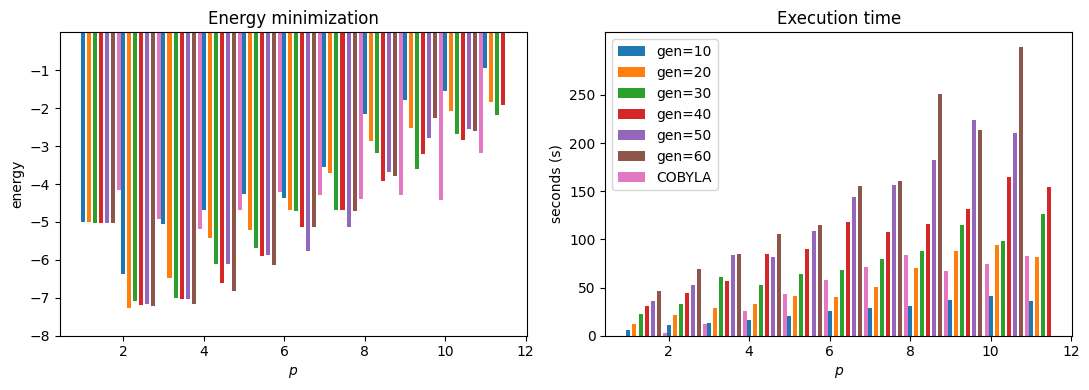

In [7]:
width = 0.10
plt.figure(figsize=(11, 4))
plt.subplot(121)
plt.title('Energy minimization')
aux = 0
for size in dt_eda.size_gen.unique():
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.bar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['best_cost'].values, width=width, label='gen='+str(size))
    
    aux = aux + 0.15

plt.bar([i + aux for i in range(1, len(gb_mean) + 1)], dt_opt_gb_mean.loc['COBYLA']['best_cost'].values[:len(gb_mean)], 
        width=width, label = 'COBYLA')

    
plt.yticks(np.arange(-8, 0, 1))
plt.xlabel('$p$')
plt.ylabel('energy')
    
plt.subplot(122)
plt.title('Execution time')
aux = 0
for size in dt_eda.size_gen.unique():
    gb_mean = dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[size]
    gb_std = dt_eda.groupby(['size_gen', 'p']).std()[['best_cost', 'time']].loc[size]
    plt.bar([i + aux for i in range(1, len(gb_mean) + 1)], gb_mean['time'].values, width=width, label='gen='+str(size))
    
    aux = aux + 0.15
    
plt.bar([i + aux for i in range(1, len(gb_mean) + 1)], dt_opt_gb_mean.loc['COBYLA']['time'].values[:len(gb_mean)], 
        width=width, label = 'COBYLA')
    
plt.legend()
plt.yticks(range(0, 260, 50))
plt.xlabel('$p$')
plt.ylabel('seconds (s)')

plt.tight_layout()

plt.show()

In [36]:
dt_eda.groupby(['size_gen', 'p']).mean()[['best_cost', 'time']].loc[30]

,best_cost,time
p,,
1,-5.025273,22.143033
2,-7.071623,32.453172
3,-6.992442,61.074386
4,-6.098024,52.627327
5,-5.683219,63.733345
6,-4.698423,67.905457
7,-4.684985,79.549778
8,-3.184201,88.007384
9,-3.610424,114.793221


In [11]:
dt_opt_gb_mean.loc['COBYLA']

,best_cost,time
p,,
1,-3.860133,1.536648
2,-5.248538,11.590783
3,-5.402065,17.111553
4,-4.536796,33.776871
5,-3.982969,40.873957
6,-4.736171,49.165862
7,-4.722458,56.506142
8,-4.299849,67.349434
9,-4.424231,74.570999


In [20]:
import scipy.stats as stats
# stats f_oneway functions takes the groups as input and returns ANOVA F and p value
fvalue, pvalue = stats.f_oneway(dt_opt[(dt_opt['p'] == 1) & (dt_opt['opt'] == 'COBYLA')]['best_cost'],
                                dt_eda[(dt_eda['p'] == 1) & (dt_eda['size_gen'] == 30)]['best_cost'])
print(fvalue, pvalue)

8.486575599300329 0.009277527142590664
